In [13]:
import cv2
import matplotlib.pyplot as plt

In [2]:
%cd yolov7

/home/joacopolo/Documents/software/projects/Pruebas-ArgentinIA/yolov7


In [6]:
# Bajamos los weights preentrenados
!wget -nc https://github.com/WongKinYiu/yolov7/releases/download/v0.1/yolov7.pt

File ‘yolov7.pt’ already there; not retrieving.



In [4]:
# Vamos a correr el codigo de deteccion para una imagen
!python detect.py --weights yolov7.pt --conf 0.25 --img-size 640 --source inference/images/horses.jpg

Namespace(weights=['yolov7.pt'], source='inference/images/horses.jpg', img_size=640, conf_thres=0.25, iou_thres=0.45, device='', view_img=False, save_txt=False, save_conf=False, nosave=False, classes=None, agnostic_nms=False, augment=False, update=False, project='runs/detect', name='exp', exist_ok=False, no_trace=False)
YOLOR 🚀 v0.1-122-g3b41c2c torch 1.13.1+cu117 CUDA:0 (NVIDIA GeForce GTX 1050 Ti, 4036.9375MB)

Fusing layers... 
RepConv.fuse_repvgg_block
RepConv.fuse_repvgg_block
RepConv.fuse_repvgg_block
Model Summary: 306 layers, 36905341 parameters, 6652669 gradients
 Convert model to Traced-model... 
 traced_script_module saved! 
 model is traced! 

/home/joacopolo/miniconda3/envs/yolov7/lib/python3.9/site-packages/torch/functional.py:504: UserWarning: torch.meshgrid: in an upcoming release, it will be required to pass the indexing argument. (Triggered internally at ../aten/src/ATen/native/TensorShape.cpp:3190.)
  return _VF.meshgrid(tensors, **kwargs)  # type: ignore[attr-define

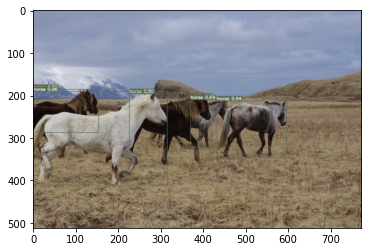

In [7]:
detection_image = cv2.imread("runs/detect/exp/horses.jpg")
detection_image = cv2.cvtColor(detection_image, cv2.COLOR_BGR2RGB)
plt.imshow(detection_image)

## Transfer Learning

In [8]:
!wget -nc https://github.com/WongKinYiu/yolov7/releases/download/v0.1/yolov7_training.pt

File ‘yolov7_training.pt’ already there; not retrieving.



In [47]:
!python train.py \
--workers 8 --device 0 --batch-size 4 --data data/diarios.yaml \
--img 640 640 --cfg cfg/training/yolov7.yaml --weights 'yolov7_training.pt' \
--name yolov7-diarios-clasificador --hyp data/hyp.scratch.p5.yaml --epochs 50

YOLOR 🚀 v0.1-122-g3b41c2c torch 1.13.1+cu117 CUDA:0 (NVIDIA GeForce GTX 1050 Ti, 4036.9375MB)

Namespace(weights='', cfg='cfg/training/yolov7.yaml', data='data/diarios.yaml', hyp='data/hyp.scratch.p5.yaml', epochs=10, batch_size=4, img_size=[640, 640], rect=False, resume=False, nosave=False, notest=False, noautoanchor=False, evolve=False, bucket='', cache_images=False, image_weights=False, device='0', multi_scale=False, single_cls=False, adam=False, sync_bn=False, local_rank=-1, workers=8, project='runs/train', entity=None, name='yolov7-diarios-clasificador', exist_ok=False, quad=False, linear_lr=False, label_smoothing=0.0, upload_dataset=False, bbox_interval=-1, save_period=-1, artifact_alias='latest', freeze=[0], v5_metric=False, world_size=1, global_rank=-1, save_dir='runs/train/yolov7-diarios-clasificador7', total_batch_size=4)
tensorboard: Start with 'tensorboard --logdir runs/train', view at http://localhost:6006/
hyperparameters: lr0=0.01, lrf=0.1, momentum=0.937, weight_decay=0

 63                -1  1    262656  models.common.Conv                      [1024, 256, 1, 1]             
 64                -1  1     33024  models.common.Conv                      [256, 128, 1, 1]              
 65                -1  1         0  torch.nn.modules.upsampling.Upsample    [None, 2, 'nearest']          
 66                24  1     65792  models.common.Conv                      [512, 128, 1, 1]              
 67          [-1, -2]  1         0  models.common.Concat                    [1]                           
 68                -1  1     33024  models.common.Conv                      [256, 128, 1, 1]              
 69                -2  1     33024  models.common.Conv                      [256, 128, 1, 1]              
 70                -1  1     73856  models.common.Conv                      [128, 64, 3, 1]               
 71                -1  1     36992  models.common.Conv                      [64, 64, 3, 1]                
 72                -1  1     36992  m

       3/9     3.44G   0.06138   0.03517   0.02179    0.1183         4       640
               Class      Images      Labels           P           R      mAP@.5
                 all           2          14     0.00245       0.107     0.00147    0.000147

     Epoch   gpu_mem       box       obj       cls     total    labels  img_size
       4/9     3.44G   0.07901   0.05386   0.02736    0.1602        44       640
               Class      Images      Labels           P           R      mAP@.5
                 all           2          14     0.00327       0.143     0.00225    0.000225

     Epoch   gpu_mem       box       obj       cls     total    labels  img_size
       5/9     3.44G   0.05035   0.03894   0.01708    0.1064         2       640
               Class      Images      Labels           P           R      mAP@.5
                 all           2          14     0.00327       0.143      0.0065     0.00065

     Epoch   gpu_mem       box       obj       cls     total    labels

In [48]:
detector_clasificador = "runs/train/yolov7-diarios-clasificador7/weights/best.pt"
test_image = "diarios/images/train/diario4.png"

In [51]:
!python detect.py --weights $detector_clasificador --conf 0.1 --img-size 640 --source $test_image

Namespace(weights=['runs/train/yolov7-diarios-clasificador7/weights/best.pt'], source='diarios/images/train/diario4.png', img_size=640, conf_thres=0.1, iou_thres=0.45, device='', view_img=False, save_txt=False, save_conf=False, nosave=False, classes=None, agnostic_nms=False, augment=False, update=False, project='runs/detect', name='exp', exist_ok=False, no_trace=False)
YOLOR 🚀 v0.1-122-g3b41c2c torch 1.13.1+cu117 CUDA:0 (NVIDIA GeForce GTX 1050 Ti, 4036.9375MB)

Fusing layers... 
RepConv.fuse_repvgg_block
RepConv.fuse_repvgg_block
RepConv.fuse_repvgg_block
IDetect.fuse
/home/joacopolo/miniconda3/envs/yolov7/lib/python3.9/site-packages/torch/functional.py:504: UserWarning: torch.meshgrid: in an upcoming release, it will be required to pass the indexing argument. (Triggered internally at ../aten/src/ATen/native/TensorShape.cpp:3190.)
  return _VF.meshgrid(tensors, **kwargs)  # type: ignore[attr-defined]
Model Summary: 314 layers, 36497954 parameters, 6194944 gradients, 103.2 GFLOPS
 Conv

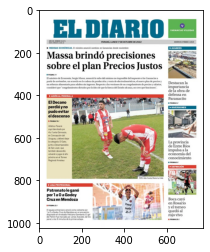

In [52]:
detection_image = cv2.imread("runs/detect/exp15/diario4.png")
detection_image = cv2.cvtColor(detection_image, cv2.COLOR_BGR2RGB)
plt.imshow(detection_image)